In [1]:
import pandas as pd

In [5]:
file_path = '/mnt/data/events.csv'
data = pd.read_csv(r"C:\Users\kseni\Downloads\dataset\electronic store events\events.csv")

Wymiary danych: 885,129 wierszy i 9 kolumn.

category_code: brakujące w 236,219 wierszach.
brand: brakujące w 212,364 wierszach.
user_session: brakujące w 165 wierszach.

655 dublikatów

In [6]:
data_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "head": data.head(),
    "info": data.info(),
    "missing_values": data.isnull().sum(),
    "duplicates": data.duplicated().sum(),
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


{'shape': (885129, 9),
 'columns': ['event_time',
  'event_type',
  'product_id',
  'category_id',
  'category_code',
  'brand',
  'price',
  'user_id',
  'user_session'],
 'head':                 event_time event_type  product_id          category_id  \
 0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
 1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
 2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
 3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
 4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   
 
                    category_code        brand   price              user_id  \
 0          electronics.telephone          NaN   31.90  1515915625519388267   
 1    computers.components.cooler       zalman   17.16  1515915625519380411   
 2                            NaN          NaN    9.81  1515915625513238515   
 3  computers.peripherals.printer       pantum  113.

Liczba wierszy po usunięciu duplikatów: 884,474 (usunięto 655 duplikatów).
Kolumny numeryczne:
price: Zakres od 0.22 do 64,771.06 (średnia: 146.33, mediana: 65.71).
product_id i category_id mają wysoki stopień zróżnicowania.

event_type: 3 unikalne wartości (view, cart, purchase), z dominacją view (79%).
category_code: 107 unikalnych wartości, z najczęstszą kategorią computers.components.videocards.
brand: 999 unikalnych marek, z najpopularniejszą asus (27,660 wystąpień).
user_session: 490,398 unikalnych identyfikatorów sesji.

Największa różnorodność w event_time (845,041 unikalnych wartości).
Wysoka liczba użytkowników (user_id: 407,283).

In [7]:
data_cleaned = data.drop_duplicates()

In [8]:
numerical_summary = data_cleaned.describe()

In [9]:
categorical_summary = data_cleaned.describe(include=['object'])

In [10]:
unique_values = data_cleaned.nunique()

In [12]:
cleaning_summary = {
    "shape_after_cleaning": data_cleaned.shape,
    "numerical_summary": numerical_summary,
    "categorical_summary": categorical_summary,
    "unique_values": unique_values
}

cleaning_summary

{'shape_after_cleaning': (884474, 9),
 'numerical_summary':          product_id   category_id          price       user_id
 count  8.844740e+05  8.844740e+05  884474.000000  8.844740e+05
 mean   1.906840e+06  2.144423e+18     146.331556  1.515916e+18
 std    1.458710e+06  6.167387e+14     296.864505  3.744026e+07
 min    1.020000e+02  2.144416e+18       0.220000  1.515916e+18
 25%    6.988030e+05  2.144416e+18      26.460000  1.515916e+18
 50%    1.452884e+06  2.144416e+18      65.710000  1.515916e+18
 75%    3.721194e+06  2.144416e+18     190.540000  1.515916e+18
 max    4.183880e+06  2.227847e+18   64771.060000  1.515916e+18,
 'categorical_summary':                      event_time event_type                    category_code  \
 count                    884474     884474                           648427   
 unique                   845041          3                              107   
 top     2021-02-04 21:48:32 UTC       view  computers.components.videocards   
 freq                

Dominują zdarzenia typu view (oglądanie produktu).
Zdarzenia cart (dodanie do koszyka) i purchase (zakup) występują znacznie rzadziej.

Asus jest najczęściej reprezentowaną marką, a za nią inne popularne marki jak Samsung i Apple.
Tylko kilka marek ma znaczącą liczbę wystąpień.

Produkty dodawane do koszyka (cart) i kupowane (purchase) mają wyższe ceny średnie w porównaniu do tych tylko oglądanych (view).
Wyraźny rozrzut cen w każdej kategorii, ale większość wartości skupia się poniżej 5000.

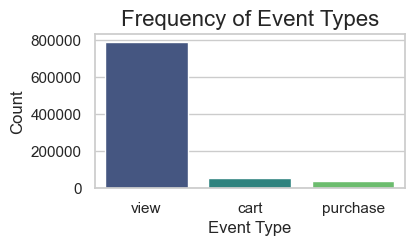

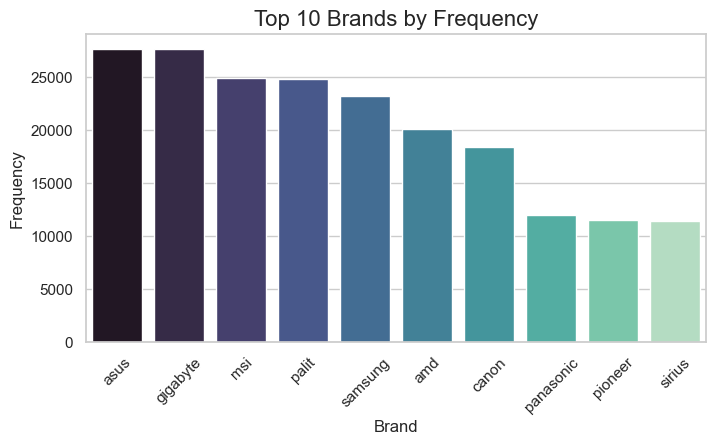

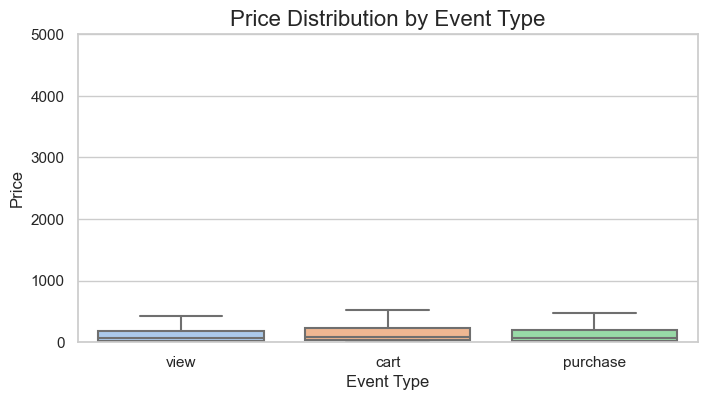

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 2. Event type frequencies
plt.figure(figsize=(4, 2))
sns.countplot(data=data_cleaned, x='event_type', palette='viridis', order=data_cleaned['event_type'].value_counts().index)
plt.title('Frequency of Event Types', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3. Top 10 brands
top_brands = data_cleaned['brand'].value_counts().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='mako')
plt.title('Top 10 Brands by Frequency', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4. Event type vs price (boxplot)
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_cleaned, x='event_type', y='price', palette='pastel', showfliers=False)
plt.title('Price Distribution by Event Type', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.ylim(0, 5000)  # Focus on the majority range
plt.show()
